In [17]:
import pandas as pd

# 文件路径
medal_counts_path = 'summerOly_medal_counts.csv'
programs_path = 'summerOly_programs.csv'
data_dict_path = 'data_dictionary.csv'
athletes_path = 'summerOly_athletes.csv'
hosts_path = 'summerOly_hosts.csv'

# 加载数据
medal_counts = pd.read_csv(medal_counts_path)
programs = pd.read_csv(programs_path, encoding='Windows-1252')
data_dict = pd.read_csv(data_dict_path, encoding='Windows-1252')
athletes = pd.read_csv(athletes_path, encoding='Windows-1252')
hosts = pd.read_csv(hosts_path, encoding='UTF-8-SIG')

In [18]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
data_dict

,summerOly_medal_counts.csv,Unnamed: 1,Unnamed: 2
0,variables,explanation,example
1,Rank,Rank of country based on total medals won,"1, 2"
2,NOC,Name of country as recorded for that Olympics,"China, France"
3,Gold,Number of Gold medals the country earned,"0, 1, 2"
4,Silver,Number of Silver medals the country earned,"0, 1, 2"
5,Bronze,Number of Bronze medals the country earned,"0, 1, 2"
6,Total,Number of Total medals the country earned,"0, 1, 2"
7,Year,Olympic year,"1896, 1900"
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [19]:
import pandas as pd

print(athletes.head())
print(medal_counts.head())
merged_df = pd.merge(athletes, medal_counts, left_on=['Team', 'Year'], right_on=['NOC', 'Year'], how='inner')

                    Name Sex            Team  NOC  Year         City  \
0              A Dijiang   M           China  CHN  1992    Barcelona   
1               A Lamusi   M           China  CHN  2012       London   
2            Gunnar Aaby   M         Denmark  DEN  1920    Antwerpen   
3            Edgar Aabye   M  Denmark/Sweden  DEN  1900        Paris   
4  Cornelia (-strannood)   F     Netherlands  NED  1932  Los Angeles   

        Sport                         Event     Medal  
0  Basketball   Basketball Men's Basketball  No medal  
1        Judo  Judo Men's Extra-Lightweight  No medal  
2    Football       Football Men's Football  No medal  
3  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4   Athletics  Athletics Women's 100 metres  No medal  
   Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896
2     3        Germany     6       5       2     13  1896

In [20]:
final_merged_df = pd.merge(merged_df, hosts, on='Year', how='inner')
final_merged_df

,Name,Sex,Team,NOC_x,Year,City,Sport,Event,Medal,Rank,NOC_y,Gold,Silver,Bronze,Total,Host
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,4,China,16,22,16,54,"Barcelona, Spain"
1,Bai Chongguang,M,China,CHN,1992,Barcelona,Boxing,Boxing Men's Light-Heavyweight,No medal,4,China,16,22,16,54,"Barcelona, Spain"
2,Bai Mei,F,China,CHN,1992,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,No medal,4,China,16,22,16,54,"Barcelona, Spain"
3,Bi Zhong,M,China,CHN,1992,Barcelona,Athletics,Athletics Men's Hammer Throw,No medal,4,China,16,22,16,54,"Barcelona, Spain"
4,Cai Yanshu,M,China,CHN,1992,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,No medal,4,China,16,22,16,54,"Barcelona, Spain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208421,Zana Pintaric,F,Slovenia,SLO,2024,Paris,Archery,Women's Individual,No medal,34,Slovenia,2,1,0,3,"Paris, France"
208422,Zana Pintaric,F,Slovenia,SLO,2024,Paris,Archery,Mixed Team,No medal,34,Slovenia,2,1,0,3,"Paris, France"
208423,Ziga Ravnikar,M,Slovenia,SLO,2024,Paris,Archery,Men's Individual,No medal,34,Slovenia,2,1,0,3,"Paris, France"
208424,Ziga Ravnikar,M,Slovenia,SLO,2024,Paris,Archery,Mixed Team,No medal,34,Slovenia,2,1,0,3,"Paris, France"


In [21]:
import pandas as pd

df = programs.fillna(0)
df = df.replace(r'\?+', '', regex=True)

# 将数据集中能转换为数字的列转换为数值类型
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


years = ['2028', '2032']

for year in years:
    # 筛选对应年份数值不为 0 的行
    filtered_df = df[df[year] != 0]

    # 计算 total sport
    total_sport = filtered_df['Sport'].nunique()

    # 计算 total discipline
    total_discipline = filtered_df['Discipline'].nunique()

    print(f'{year}年 total sport: {total_sport}')
    print(f'{year}年 total discipline: {total_discipline}')

2028年 total sport: 38
2028年 total discipline: 53
2032年 total sport: 38
2032年 total discipline: 53


In [22]:
df.to_csv('program_new.csv', encoding='utf-8', index=False)

In [23]:
final_program_merged_df = pd.merge(final_merged_df, df, on='Sport', how='inner')
final_program_merged_df

,Name,Sex,Team,NOC_x,Year,City,Sport,Event,Medal,Rank,...,1996,2000,2004,2008,2012,2016,2020,2024,2028,2032
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,4,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
1,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,4,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,Cong Xuedi,F,China,CHN,1992,Barcelona,Basketball,Basketball Women's Basketball,Silver,4,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
3,Cong Xuedi,F,China,CHN,1992,Barcelona,Basketball,Basketball Women's Basketball,Silver,4,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,Gong Xiaobin,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,4,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276949,VANESSA,F,Portugal,POR,2024,Paris,Breaking,B-Girls,No medal,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
276950,INDIA,F,Netherlands,NED,2024,Paris,Breaking,B-Girls,No medal,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
276951,MENNO,M,Netherlands,NED,2024,Paris,Breaking,B-Boys,No medal,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
276952,LEE,M,Netherlands,NED,2024,Paris,Breaking,B-Boys,No medal,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [24]:
final_program_merged_df.to_csv('final_merged_data.csv', encoding='utf-8', index=False)

In [25]:
import pandas as pd

df = pd.read_csv('final_merged_data.csv', encoding='utf-8')
print(df.head()) 
print(df.columns)

           Name Sex   Team NOC_x  Year       City       Sport  \
0     A Dijiang   M  China   CHN  1992  Barcelona  Basketball   
1     A Dijiang   M  China   CHN  1992  Barcelona  Basketball   
2    Cong Xuedi   F  China   CHN  1992  Barcelona  Basketball   
3    Cong Xuedi   F  China   CHN  1992  Barcelona  Basketball   
4  Gong Xiaobin   M  China   CHN  1992  Barcelona  Basketball   

                           Event     Medal  Rank  ... 1996  2000  2004  2008  \
0    Basketball Men's Basketball  No medal     4  ...  0.0   0.0   0.0   0.0   
1    Basketball Men's Basketball  No medal     4  ...  2.0   2.0   2.0   2.0   
2  Basketball Women's Basketball    Silver     4  ...  0.0   0.0   0.0   0.0   
3  Basketball Women's Basketball    Silver     4  ...  2.0   2.0   2.0   2.0   
4    Basketball Men's Basketball  No medal     4  ...  0.0   0.0   0.0   0.0   

   2012 2016 2020 2024 2028  2032  
0   0.0  0.0  2.0  2.0  2.0   2.0  
1   2.0  2.0  2.0  2.0  2.0   2.0  
2   0.0  0.0  2.0  2

/tmp/ipykernel_2506072/1197785367.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

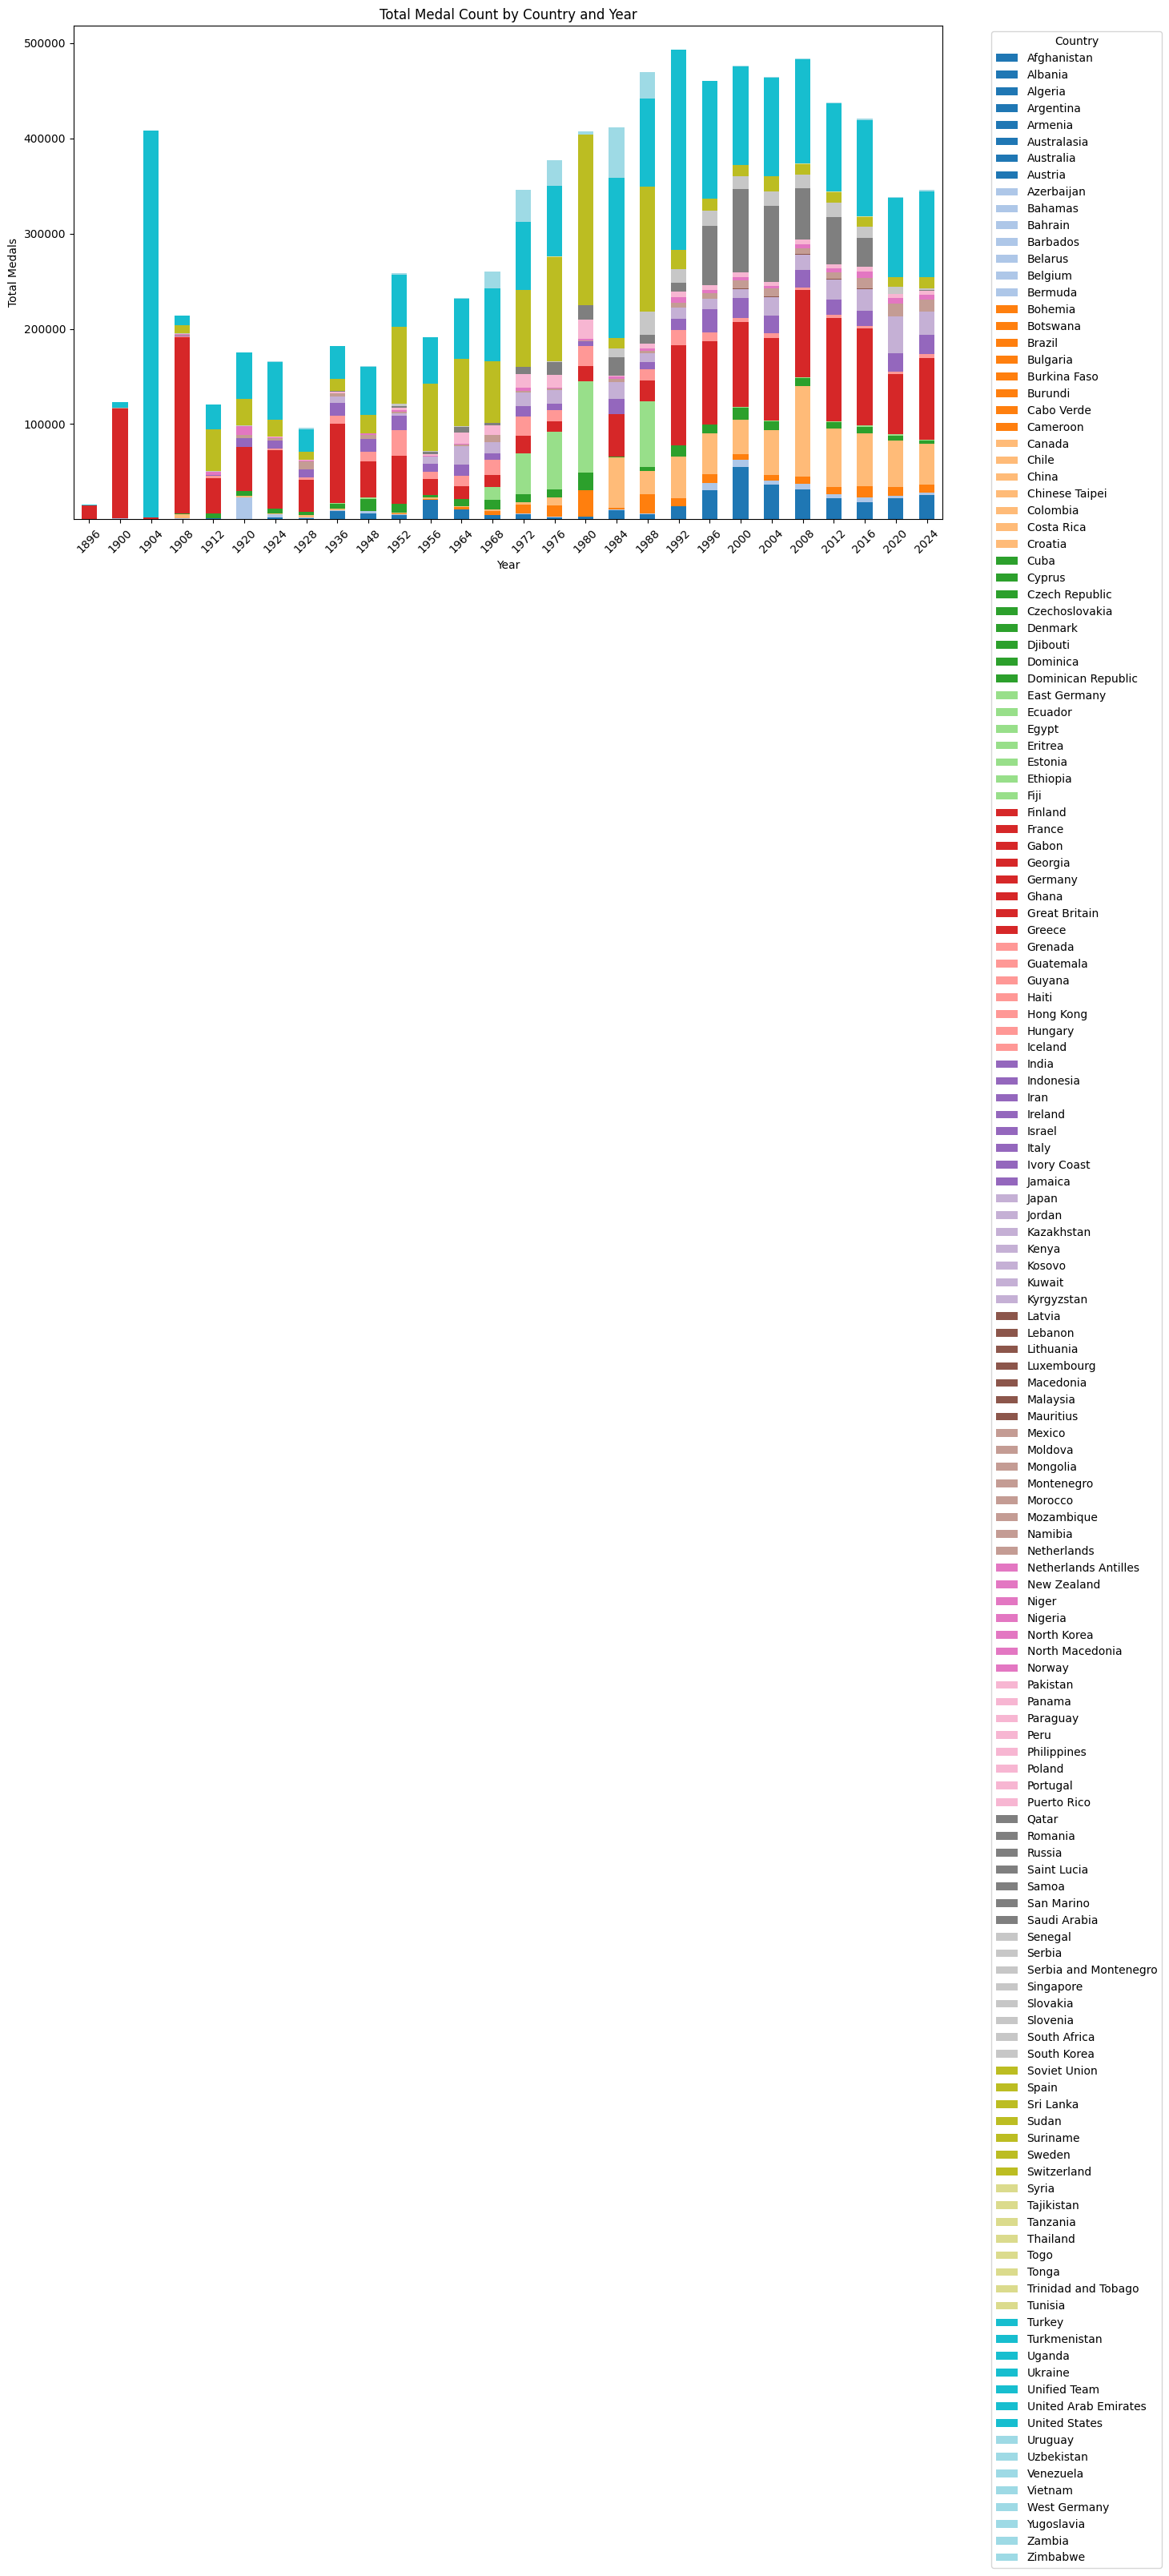

In [26]:
import matplotlib.pyplot as plt

# 按国家和年份汇总奖牌总数
total_medals = final_program_merged_df.groupby(['Year', 'Team'])['Total'].sum().unstack()

plt.figure(figsize=(12, 8))
# 使用 colormap 参数修改颜色
total_medals.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title("Total Medal Count by Country and Year")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

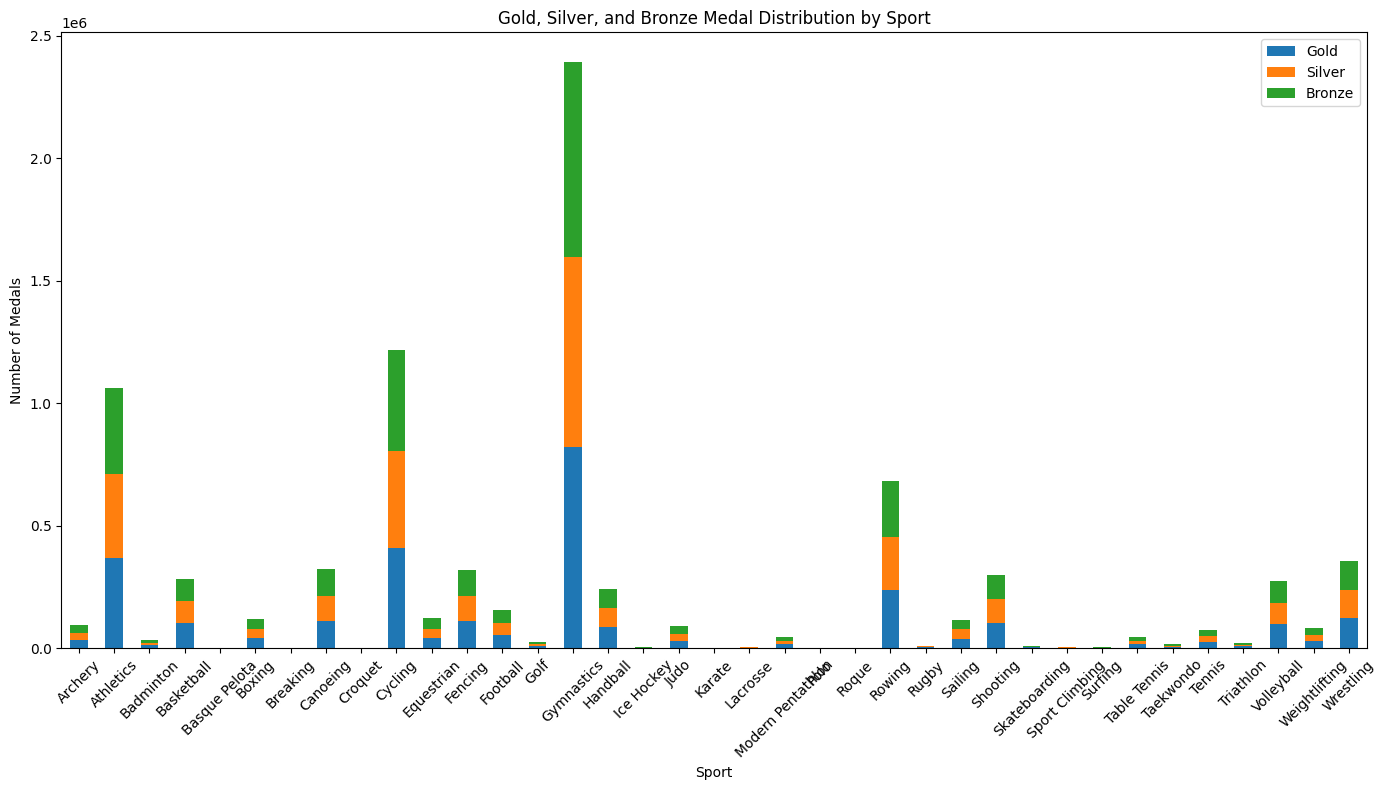

In [27]:
# 按运动项目汇总奖牌数
medals_by_sport = final_program_merged_df.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum()

# 绘制金、银、铜牌分布图
medals_by_sport.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Gold, Silver, and Bronze Medal Distribution by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


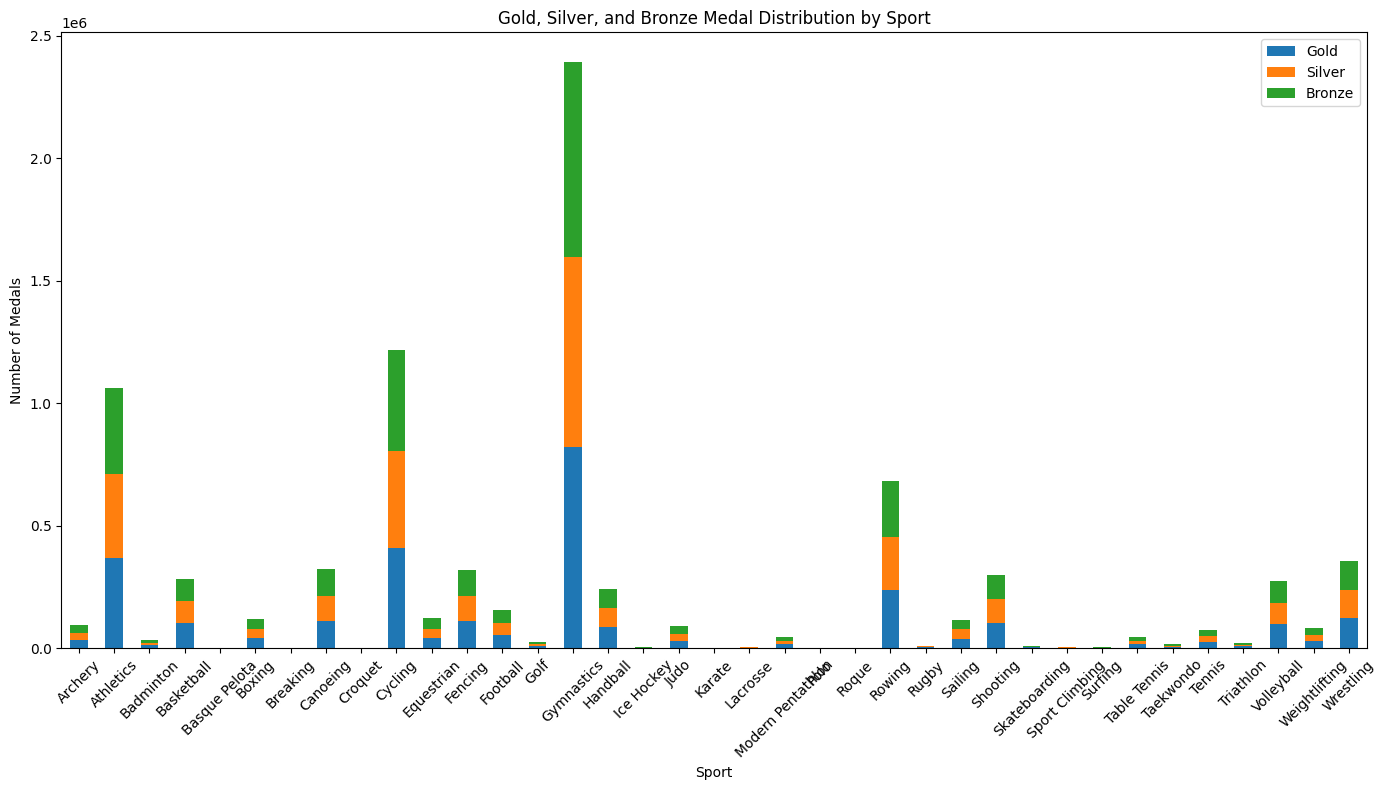

In [28]:
# 按运动项目汇总奖牌数
medals_by_sport = final_program_merged_df.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum()

# 绘制金、银、铜牌分布图
medals_by_sport.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Gold, Silver, and Bronze Medal Distribution by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


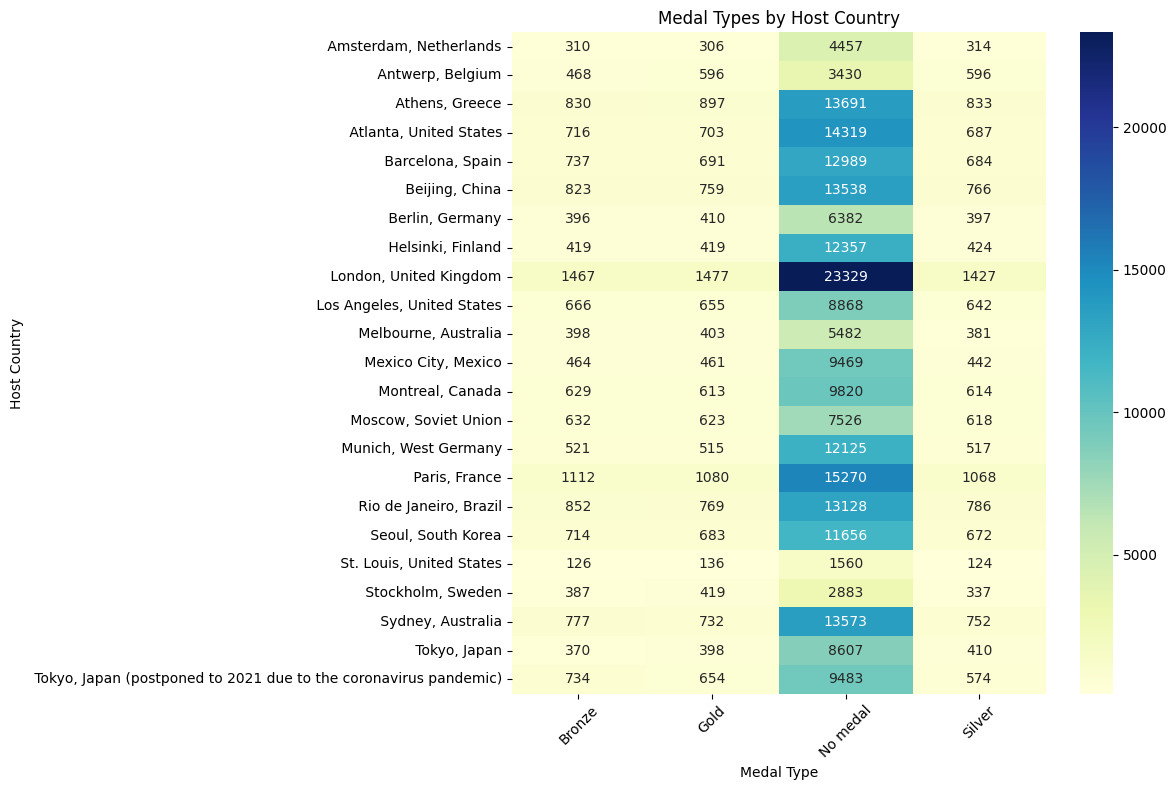

In [29]:
import seaborn as sns

# 创建一个奖牌类型与主办国家的透视表
medals_by_host = final_program_merged_df.pivot_table(index='Host', columns='Medal', aggfunc='size', fill_value=0)

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(medals_by_host, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Medal Types by Host Country")
plt.xlabel("Medal Type")
plt.ylabel("Host Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


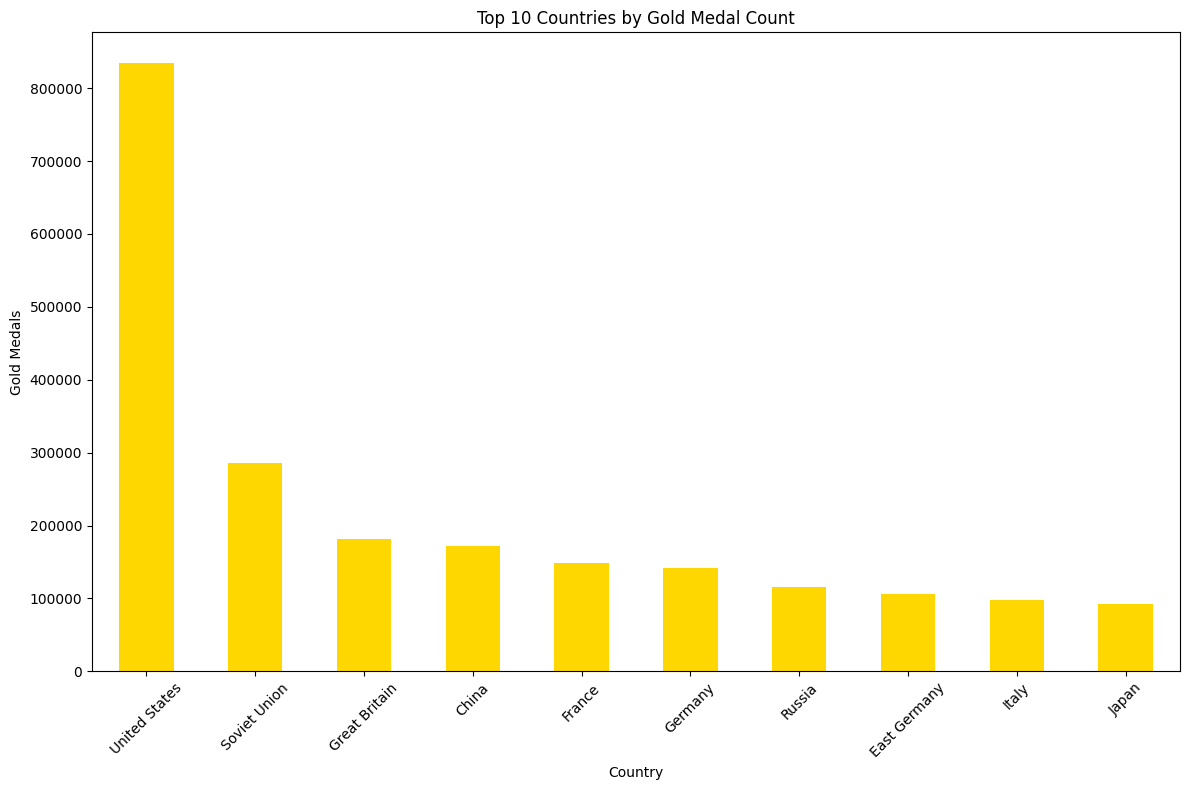

In [30]:
# 按国家统计金牌数量
gold_medals = final_program_merged_df.groupby('Team')['Gold'].sum().sort_values(ascending=False)

# 绘制金牌国家排名
plt.figure(figsize=(12, 8))
gold_medals.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Gold Medal Count")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


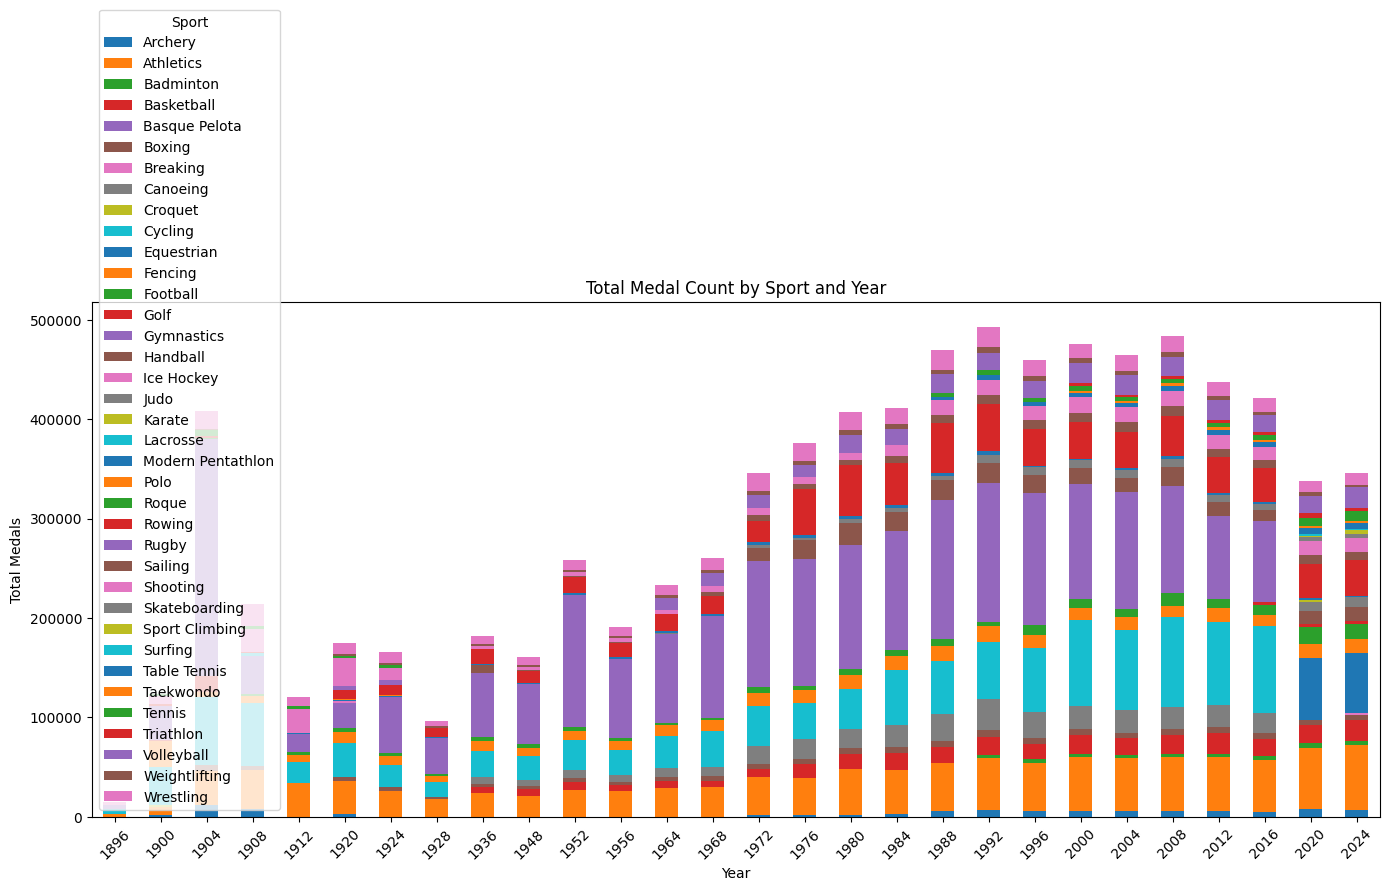

In [31]:
# 按年和运动项目汇总奖牌数
medals_by_year_sport = final_program_merged_df.groupby(['Year', 'Sport'])['Total'].sum().unstack()

# 绘制每年不同运动项目的奖牌数
medals_by_year_sport.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Total Medal Count by Sport and Year")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
